<img src="./../images/data_munging_pydata2023_title_slide.png" width="95%" align="center" alt="Data Wrangling with Python, A Tutorial for PyData Global 2023" />  

**Versatility**. / ˌvɜr səˈtɪl ɪ ti / noun:   
ability to adapt or be adapted to many different functions or activities.

20+ years  
I consistently hear:  
##### <font color='red'>"Tech's changing so fast, *it's hard to keep up*..."</font>

Do you too?

# @me

* @shauryashaurya on LinkedIn, Facebook.
* @shaurya.shaurya on Instagram 
    * (someone plucked shauryashaurya from under me)
* Two decades
* work at Barnes and Noble LoudCloud
* work on Data, Cloud, Data + Cloud
<br/>

#### Also...
* I write. Plays, screenplays, short stories etc.
* Got to shoot and produce a feature film last year!
    
<img src="./../images/Eight-Down-Toofaan-Mail-2022-512.jpg" width="30%" align="center" alt="Film: 8 Down Toofaan Mail" />  

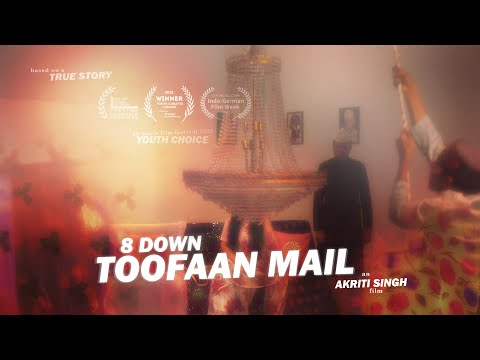

In [2]:
# Trailer for 'Eight Down Toofaan Mail'
from IPython.display import YouTubeVideo
YouTubeVideo('KthvCCE2Vrk', width=560, height=315)

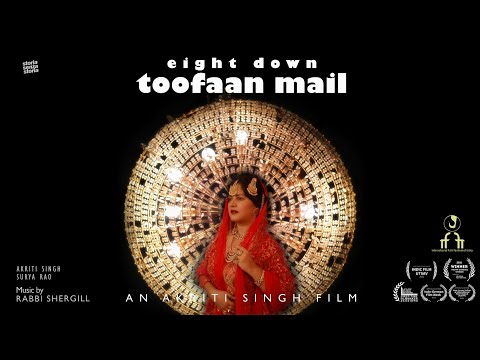

In [3]:
# Complete film (with English Subtitles) now released on YouTube
from IPython.display import YouTubeVideo
YouTubeVideo('VnHPtozfhRU', width=560, height=315)

Needless to say, I love films.

Hence the [MovieLens](https://grouplens.org/datasets/movielens/) Dataset. :)    
That, and the fact that is easy to grok and super interesting! 

### ...back to that "<font color='red'>*tech changes so fast...*</font>" bit
I always found it odd when folks said it.  
...and couldn't put down why I didn't feel so overwhelmed.  

Then I got to collaborate on a play...    
  
<img src="./../images/TheLittlePrince.jpg" width="30%" align="center" alt="Cover art of The Little Prince by Antoine de Saint-Exupéry (1900-1944)" />   
<font size="-5">Cover art of The Little Prince by Antoine de Saint-Exupéry (1900-1944)</font> 

...where I came across this quote:<br/>
<font size='+1'>If you want to build a ship,<br/>
don't drum up people to collect wood and<br/>
don't assign them tasks and work, but rather<br/>
<strong>teach them to<br/>
<font color='red'>long for the endless immensity of the sea.</font></strong><br/>
<em>— Antoine de Saint Exupéry</em></font>

<font size='+1'><strong>teach them to<br/>
<font color='red'>long for the endless immensity of the sea.</font></strong></font>

This Tutorial is my attempt at that.  

See, we get too tangled up in the technology,  
not enough in the *problems it's solving*.  

If we get interested in the data,   
ideas within vs. the syntax of the data engine...   
  
The complexities of a  
new technology/framework/engine  
*become easy to handle*.  

When we long for the *sea*,  
the *ship* becomes the easy part...  

# Approach

* Here we'll start with plain old Python
* Then gradually cover how each different data engine tries to do better

## What we'll cover
1. Baseline - **Core Python Collections**
1. How **NumPy** improves things
1. Moving on to *DataFrames* in **Pandas**
1. How **Spark (*pySpark*)** enables *data*-parallel distributed out-of-core processing
1. How **Dask** does, *task*-parallel distributed out-of-core processing
1. (time permits) How **Polars** does **Pandas** but bigger, faster etc.

### Honestly
Each of the tech that we'll discuss,  
have more interesting features than can be covered in a few hours.   
  
Typically this tutorial blooms into a 3 to 5 day event.  
  
So, ... 

## What we'll not cover in this PyData Global 2023 session  
1. Specific scenarios like functools, itertools, time-series or categorical data
2. Streaming
3. Data Visualization
4. Database systems / engines
5. Optimization
6. Infrastructure / deployment
7. Data Pipelines
8. Other sundry bits and applesauce

We just have 2 hours. :)  

# Interact!

* Ask questions, tangents are very welcome
* Put up questions, thoughts up as [discussions](https://github.com/shauryashaurya/learn-data-munging/discussions) directly on the GitHub repo  
    - The stuff we are unable cover here, I'll attend to on GitHub.
* [Fork](https://github.com/shauryashaurya/learn-data-munging/fork) the repo, submit a [pull request](https://github.com/shauryashaurya/learn-data-munging/pulls)!

This tutorial is continually evolving. I will keep adding new notebooks, topics, exercises etc. as well as explore upcoming frameworks/libraries/engines. Watch this space!

# Let's GO!

You can start by accessing the repo on GitHub

Link: https://github.com/shauryashaurya/learn-data-munging

GitHub -> Search for "*shauryashaurya*" -> ```learn-data-munging```

<font color='green'><em>Give a quick walkthrough of the GitHub Repo</em></font>

# Inverting the Pyramid  
To select the right ship for exploring the sea, consider the following aspects:  
1. lazy / eager execution
2. scalar / vector operations   
3. data representation in memory (row-wise / columnar)  
4. data representation on disk (row-wise / columnar)  
5. task scheduling, optimization considerations
6. how 'poly' does the ecosystem get? - underlying complexities  

# Data Analysis with Python

* **Eager Evaluation** - compute as soon as you see the expression. Sub-optimal for larger datasets - as we may only be using a part of the data (filter or window) for subsequent operations. 
* **Data representation in memory** - row-wise in memory, store an entire row, then the next and the next and so on...
    * Each row an ```Object``` - all the functions and metadata that Python adds (which in the specific case of Data Analysis *may* be an overhead)
![Row-Wise Representation of Data](./../images/PyDataGlobal2023-PythonMemoryStorage.drawio.png)  

   
<font color='green'><em>Switch to the Python Notebook</em></font>

# In Summary: Python  
  
* Eager Evaluation - compute as soon as you see the expression. Sub-optimal for larger datasets - as we may only be using a part of the data (filter or window) for subsequent operations. 
* Represents 2D data row-wise in memory, store an entire row, then the next and the next and so on...
* Each row an ```Object``` - all the functions and metadata that Python adds (which in the specific case of Data Analysis *may* be an overhead)

Remember this, we'll revisit the idea in a bit:  
  
![Row-Wise Representation of Data](./../images/PyDataGlobal2023-PythonMemoryStorage.drawio.png)  

*  Operations that retrieve all the data for a given object (the entire row) are fast, but these whole-row operations are generally rare.
*  Still with Collections, Itertools and Functools - Python is a lot of fun!

Like we saw in the notebook:   
**48** methods support each list and **81** methods support each element in the list.  
  
These methods are great (duck typing is awesome) because they provide ease and flexibility, but they don't scale with data volume and there's a fair amount of overhead, for our purposes.  

That gives us insight into how NumPy improves things for structured data.  

# Numpy

* Numpy uses uniform data types - no more Python overhead - this speeds things up.
* NumPy optimizes for keeping data in *contiguous* blocks of memory to improve performance and efficiency

 ![Row-Wise Representation of Data](./../images/PyDataGlobal2023-PythonvsNumpy.drawio.png)   

* Can represent data row-oriented (C-Order) or column-oriented(Fortran-Order) in memory  
* Column Oriented: all values of a column are adjacent, then values of the next column and the next and so on...

![Row-Wise Representation of Data](./../images/MemoryRepresentation.drawio.png)

### Column-wise (or *Columnar*) helps because:
* Operations that retrieve all the data for a given object (the entire row) are slower.
* However, we usually need only a few columns, not all.
    * For e.g., if we need the average rating of a movie, we only need movieId and rating and do not need to load  the other columns
    * Another e.g., find the max salary from employee table - we only need employee_id and salary columns.
    
- This approach makes things ***FAST!** (and memory efficient)*
  
- Apache Arrow also enables column-oriented representation of data in memory (more, later).

Let's look at some intricacies of NumPy before we get into Pandas.  
  
<font color='green'><em>Switch to the NumPy Notebook</em></font>

# In Summary: NumPy

* Significantly faster vectorized execution than pure Python scalar operations
* Homogeneous Data Types - one column, one type
* Low-level implementation in C
* Tons of helper functions for Math and Numbers
* Not enough for regular data wrangling - that's where Pandas comes in...

# Pandas
* **Split-Apply-Combine** approach based on R's ```plyr``` package  
* Leverages NumPy arrays internally
* Columnar representation in memory (each column is a Fortran-style NumPy Array)
* DataFrames grammar to ease data analysis
  
* *v2.x can use the **Apache Arrow** backend too - we'll talk more about this later*
    * [Apache Arrow](https://arrow.apache.org/) provides columnar format for in-memory data

# Quick curiosity note on Apache Arrow and Numpy 1/3

<font color='red'><em>ignore this slide in the first pass, or if you find it confusing</em></font>

We'll keep running into Apache Arrow - Pandas, Spark, Dask and others all talk about it.  
I often get asked, "if we already have columnar arrays in NumPy, why do we need Arrow?"  
So I think it may be helpful to spend a minute on the key difference between Arrow and columnar arrays created in NumPy.  

# Quick curiosity note on Apache Arrow and Numpy 2/3

<font color='red'><em>ignore this slide in the first pass, or if you find it confusing</em></font>

* Both can represent data in a columnar fashion in memory
* When adding or updating an element:
    * NumPy prioritizes maintaining data in contiguous memory blocks to optimize performance  
    * NumPy may copy the entire array to a new memory block (depends on the specific operation and memory layout of the existing array)  

# Quick curiosity note on Apache Arrow and Numpy 3/3

<font color='red'><em>ignore this slide in the first pass, or if you find it confusing</em></font>

* Apache Arrow uses a Zero-Copy Serialization approach on the other hand. It updates the pointers to the data but does not copy the data over to a new location in the memory, providing better performance over NumPy (again depends on specific operations)
* This Zero-Copy strategy helps in dealing with higher data volume
* Arrow provides additional features for interoperability and extensibility - support custom/complex data types across a variety of systems and processes.

Let's play with Pandas some, before we get into larger datasets with Spark.
  
<font color='green'><em>Switch to the Pandas Notebook</em></font>

# In Summary: Pandas

* Primarily designed to represent tabular data, primarily use **eager evaluation**  
* Under the hood, each column in a dataframe or series is a NumPy array   
    * This means data types need your attention  
* The NumPy array inside a Pandas DataFrame is row-oriented
* v2.x onwards, can be configured to use Apache Arrow backend instead of NumPy

* The **index** is a fundamental data structure that serves two main purposes  
    * *Labeling*: provide unique labels for identifying each row in a DataFrame or Series  
    * * Data alignmen*t:kinda crucial, fore merging, joining, and subsettin  
    * I like to think of it as a loose equivalent of the *primary key* in RDBMS situations  
* The index is immutable and does not allow duplicate values - I mean obvs right?  
  
Managing the index, row-oriented memory etc. make it hard to use Pandas for larger volumes of data, this is where Spark steps in. .

# Spark

* Distributes data across multiple compute nodes, then a central scheduler manages which node processes what part of the data
* Row-wise representation (unless Catalyst can optimize)
* Currently the most feature-rich among distributed engines
* Catalyst optimizer and Tungsten execution engine can take full advantage of **lazy evaluation**

Spark has many moving parts and not trivial to start using (unlike Pandas and Numpy)  
So instead of over-whelming you with mumbo-jumbo, let's keep looking at the Sea and not worry so much about the ship.  
<font color='green'><em>Switch to the Spark Notebook</em></font>

# In Summary: Spark

* Lazy  
* Java + Scala + Python
* Operations (deploying and managing clusters, data transfer, I/O, maintenance) become a significant part of the strategy
* this needs more than one slide...

# Eager vs. Lazy Evaluation  
* Eager: Expressions evaluated immediately (when encountered), result is stored and readily available for later use.
* Lazy: Evaluation of expressions is delayed until their value is *explicitly* requested
    * Allows us to assess the entire task pipeline to optimize, avoid unnecessary data/computations, efficient memory usage, handle large volumes of data
* Spark captures all your processing as **transformations** and triggers computation when you invoke an **action**. Examples:
    * Transformations: ```map(func)```, ```filter(func)```, ```join(df2)``` etc.
    * Actions: ```collect()```, ```count()```, ```saveAsTextFile()``` etc.

# Catalyst Optimizer

Extensible query optimizer framework introduced in Spark SQL.  
Primary purpose is to optimize SQL queries in Spark.  
Also used to optimize DataFrame API operations, which are logically represented as trees of logical operators.  

Here's what Catalyst does:

##### **Catalyst Optimizer**: *Logical Optimization*  
This step involves rule-based optimizations on the logical plan.  
These rules include predicate pushdown, constant folding, and other traditional database optimization rules.  

##### **Catalyst Optimizer**: *Physical Planning*  
Once the logical optimizations are done, Catalyst generates multiple potential physical plans from the logical plans.  
It then chooses the most optimal physical plan based on a cost model.

##### **Catalyst Optimizer**: *Code Generation*  
To achieve better performance, Catalyst generates bytecode on the fly for the chosen physical plan, converting it into compact JVM bytecode.  
[Leverages](https://github.com/apache/spark/blob/master/licenses-binary/LICENSE-janino.txt) [`Janino`](http://janino-compiler.github.io/janino/) and removes much of the overhead that comes from interpreting high-level code.

# Tungsten Execution Engine
Introduced in Spark 1.4.  
Focuses on improving the efficiency of memory and CPU for Spark computations.  
Goals are to improve the hardware efficiency of Spark jobs and push performance closer to the limits of modern hardware.

##### **Tungsten Execution Engine**: *Memory Management and Binary Processing*  
Spark traditionally relied on the JVM's object model and garbage collection, which are not optimized for big-data needs.  
Tungsten manages memory explicitly and uses off-heap memory to eliminate the overhead of JVM object model and GC.  
It represents data using a binary format, enabling efficient operations without deserializing the data.  

##### **Tungsten Execution Engine**: *Cache-aware computation*  
Tungsten optimizes the layout of data in memory for better cache locality, allowing operations on this data to be performed more quickly.

##### **Tungsten Execution Engine**: *Code Generation*  
Similar to Catalyst, Tungsten generates bytecode for query execution. However, while Catalyst focuses on optimizing SQL operations, Tungsten's code generation aims to optimize the lower-level physical operations (e.g., sorting, shuffling).

So if Spark can do all this, what does Dask bring to the table?

# Dask

* **Task based**: Distribute tasks and data across multiple nodes
    * So you can run multiple copies of Pandas and Dask will distribute part of your data to each copy, then collect results. Ah!
    * So your individual data processing engines can be GPU aware and Dask would still work. Ah!
* Dask Distributed, Spark Scheduler - brothers from different mothers: Schedule and manage tasks across distributed environments
* Dask Delayed and Dask Futures - provide a **lazy evaluation** and **asynchronous** interface for running tasks

<font color='green'><em>Switch to the Dask Notebook</em></font>

# In Summary: Dask

* Lazy  
* Bring your own engine
* Contained within Python - so you have the entire Python ecosystem at your disposal
* In practical terms has limits to the volume it can handle. More than Pandas, less than Spark (but fast changing)
* But it's so much easier to manage (IMHO)

# Polars
(*Whoa! We found the time!*)

* Distribute across multple nodes
* Columnar representation (**Apache Arrow**)

![Column-Oriented-Storage](./../images/Column-Wise-Representation.drawio.png)

# Revisiting the Pyramid
* lazy / eager execution
* scalar / vector operations
* data representation in memory (row-wise / columnar)
* data representation on disk (row-wise / columnar)
* task scheduling, optimization considerations
* how 'poly' does the ecosystem get? - underlying complex, esp. with larger Spark clustersitiesities

# What Next?

* Several notebooks are a work-in-progress (due to the time I am able to spare these days)   
* Upcoming:  
	- Build your own data engine from scratch in a day  
	- Build your own RegEx engine   
    - More Practice Exercises
    - Arrow in-depth 
    - Custom optimizers in Spark
    - Bias and Skew in Ratings
* Would love more collaboration from the Community!

# Thank you PyData Global 2023
## You folks are all aces!

<img src="./../images/data_munging_pydata2023_closing.png" width="95%" align="center" alt="Thank you PyData Global 2023" />  
